# EDA WITH DATA OF INTEREST

In this script we perform an exploratory data analysis before starting to apply time series methods.

In [89]:
# Importing packages:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [90]:
file_path = "../../data/02_intermediate/"
file_name = "b2-transactions.csv"

filtered_file_name='filtered_transactions_not_clean.csv' # "c1-filtered_transactions.csv"

sep=";"

In [91]:
dict_of_products={'croissant': 100,
                  'croissant petit': 103,
                  'tarta mousse 3 chocolates': 10002,
                  'tarta de manzana 2º': 462,
                  'palmeras de trufa': 182,
                  'tarta opera': 414,
                  'postre fresas y mascarpone': 4511,
                  'milhojas frambuesa 2º': 459,
                  'torteles': 112,
                  'baguette': 115}

In [92]:
filtered_df=pd.read_csv(file_path+filtered_file_name, sep=sep)

In [93]:
filtered_df.describe()

,product_id,section,units_ordered
count,3293.000000,3293.0,3293.000000
mean,929.879745,0.0,5.243851
std,1925.672432,0.0,8.918273
min,100.000000,0.0,0.000000
25%,103.000000,0.0,0.000000
50%,182.000000,0.0,2.000000
75%,462.000000,0.0,6.000000
max,9999.000000,0.0,80.000000


In [94]:
filtered_df.shape

(3293, 8)

In [95]:
filtered_df.head()

,product_id,description,section,store,desc_normalized,target_names_prod_by_prod,date,units_ordered
0,462.0,MANZANA 2º,0,BmUP,manzana 2,tarta de manzana,2013-10-01,1
1,459.0,MILHOJAS FRAMBUESA 2º,0,BmUP,milhojas frambuesa 2,milhojas frambuesa,2013-10-01,1
2,112.0,TORTELES,0,BmUP,torteles,tortel,2013-10-01,15
3,115.0,BAGUETTE MALLORCA,0,BmUP,baguette mallorca,baguette,2013-10-01,7
4,112.0,TORTELES,0,BmUP,torteles,tortel,2013-10-01,0


In [96]:
filtered_df['target_names_prod_by_prod'].unique()

array(['tarta de manzana', 'milhojas frambuesa', 'tortel', 'baguette',
       'croissant simple', 'croissant petit',
       'postre de fresas y mascarpone', 'palmera chocolate',
       'mousse tres chocolates', 'tarta opera'], dtype=object)

In [97]:
filtered_df[filtered_df['target_names_prod_by_prod']=='frambuesa 2']

,product_id,description,section,store,desc_normalized,target_names_prod_by_prod,date,units_ordered


In [98]:
filtered_df.rename(columns={'Unnamed: 0':'original_index'}, inplace=True)

In [99]:
products=filtered_df['target_names_prod_by_prod'].unique()
stores=filtered_df['store'].unique()

In [100]:
print(stores)

['BmUP']


In [101]:
print(products)

['tarta de manzana' 'milhojas frambuesa' 'tortel' 'baguette'
 'croissant simple' 'croissant petit' 'postre de fresas y mascarpone'
 'palmera chocolate' 'mousse tres chocolates' 'tarta opera']


In [102]:
aaa=pd.pivot_table(data=filtered_df,values='units_ordered', index='date', columns=['store','target_names_prod_by_prod'])

In [103]:
aaa.head()

store                         BmUP                                   \
target_names_prod_by_prod baguette croissant petit croissant simple   
date                                                                  
2009-06-16                     2.0             5.0              0.0   
2009-06-28                     NaN             NaN              6.0   
2011-06-23                     NaN             NaN              NaN   
2011-06-24                     3.0             6.0              1.5   
2011-06-25                     4.0             8.0              3.0   

store                                                                \
target_names_prod_by_prod milhojas frambuesa mousse tres chocolates   
date                                                                  
2009-06-16                               NaN                    0.0   
2009-06-28                               NaN                    NaN   
2011-06-23                               2.0                    NaN   
2011-06-24                               0.5                    NaN   
2011-06-25                               0.0                    0.0   

store                                                                      \
target_names_prod_by_prod palmera chocolate postre de fresas y mascarpone   
date                                                                        
2009-06-16                              NaN                           NaN   
2009-06-28                              NaN                           NaN   
2011-06-23                              2.0                           4.0   
2011-06-24                              4.0                           6.0   
2011-06-25                              4.0                           NaN   

store                                                          
target_names_prod_by_prod tarta de manzana tarta opera tortel  
date                                                           
2009-06-16                             NaN         NaN    0.0  
2009-06-28                             NaN         NaN    NaN  
2011-06-23                             1.0         NaN    NaN  
2011-06-24                             1.0         NaN    0.0  
2011-06-25                             NaN         NaN    0.0

In [104]:
aaa.fillna(0.0, inplace=True)

In [105]:
aaa.head()

store                         BmUP                                   \
target_names_prod_by_prod baguette croissant petit croissant simple   
date                                                                  
2009-06-16                     2.0             5.0              0.0   
2009-06-28                     0.0             0.0              6.0   
2011-06-23                     0.0             0.0              0.0   
2011-06-24                     3.0             6.0              1.5   
2011-06-25                     4.0             8.0              3.0   

store                                                                \
target_names_prod_by_prod milhojas frambuesa mousse tres chocolates   
date                                                                  
2009-06-16                               0.0                    0.0   
2009-06-28                               0.0                    0.0   
2011-06-23                               2.0                    0.0   
2011-06-24                               0.5                    0.0   
2011-06-25                               0.0                    0.0   

store                                                                      \
target_names_prod_by_prod palmera chocolate postre de fresas y mascarpone   
date                                                                        
2009-06-16                              0.0                           0.0   
2009-06-28                              0.0                           0.0   
2011-06-23                              2.0                           4.0   
2011-06-24                              4.0                           6.0   
2011-06-25                              4.0                           0.0   

store                                                          
target_names_prod_by_prod tarta de manzana tarta opera tortel  
date                                                           
2009-06-16                             0.0         0.0    0.0  
2009-06-28                             0.0         0.0    0.0  
2011-06-23                             1.0         0.0    0.0  
2011-06-24                             1.0         0.0    0.0  
2011-06-25                             0.0         0.0    0.0

In [106]:
prov=filtered_df.groupby(['target_names_prod_by_prod','date'], as_index=False).sum()[['target_names_prod_by_prod', 'date', 'units_ordered']]

In [107]:
bbb=pd.pivot_table(data=prov,values='units_ordered', index='date', columns='target_names_prod_by_prod')

In [108]:
bbb.fillna(0.0, inplace=True)

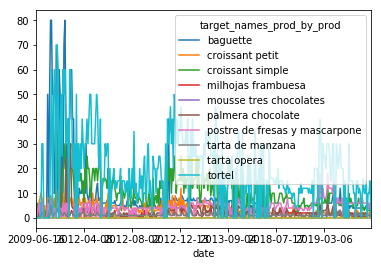

In [109]:
bbb.plot()

In [110]:
bbb.max()

target_names_prod_by_prod
baguette                         80.0
croissant petit                  12.0
croissant simple                 35.0
milhojas frambuesa                5.0
mousse tres chocolates            2.0
palmera chocolate                30.0
postre de fresas y mascarpone    18.0
tarta de manzana                  5.0
tarta opera                       1.0
tortel                           70.0
dtype: float64